# CLASSIFICATION

[Back-to-top](#CSC8635-COURSEWORK)  
[EDA](#Exploratory-Data-Analysis)  
[PIPELINE-1](#PIPELINE-1)  
[PIPELINE-2](#PIPELINE-2)  
[PIPELINE-3](#PIPELINE-3)  
[PIPELINE-4](#PIPELINE-4)  
[RESULT](#RESULT-Classification)

**Overview of the dataset**

The Fatality Analysis Reporting System (FARS) is a comprehensive database in the United States that documents fatal traffic accidents.
Managed by the National Highway Traffic Safety Administration (NHTSA), this dataset has been publicly accessible since 1975.

Some of the information captured in this dataset include:
- CASE_STATE : The US state in which the accident has
- PERSON_TYPE : This variable indicates if the person is the driver/ passenger/ etc.,
- RACE : The Race of the person (Black/ White/ etc.,)
- INJURY_SEVERITY : The severity of the crash including but not limited to no_injury, fatal_injury, incapacitating_injury

The dataset includes both numerical and categorical variables and INJURY_SEVERITY is our target variable. It has over 100,000 records.

In [ ]:
import numpy as np # Library for performing numerical tasks
import pandas as pd # Library for dataset wrangling 
import matplotlib.pyplot as plt # Library for plotting
import seaborn as sns # Library for plotting

from sklearn.pipeline import Pipeline # To create separate pipelines for ease of execution

from sklearn.preprocessing import StandardScaler # For Scaling the data

# For Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 


# For Splitting the data into train/test or train/test/validation sets
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


from sklearn.feature_selection import RFE # For Recursive Feature Elimination

# Performance Metrics for Model Evaluation
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, mean_absolute_error, r2_score 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Libraries specific for Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


# Libraries specific for Regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer

# Libraries specific for NLP
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans # Clustering
from sklearn.decomposition import LatentDirichletAllocation  # LDA
from sklearn.preprocessing import MaxAbsScaler 


import warnings
warnings.filterwarnings("ignore") 

### Exploratory Data Analysis

[Back-to-Classification](#CLASSIFICATION) 

#### 1. Reading the CSV

In [2]:
fars_data = pd.read_csv('fars.csv')
fars_data.head()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,Alabama,34,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Available_but_Not_Deployed_for_this_Seat,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
1,Alabama,20,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Deployed_Air_Bag_from_Front,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
2,Alabama,43,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
3,Alabama,38,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
4,Alabama,50,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Deployed_Air_Bag_from_Front,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury


- The read_csv function is used from the pandas library to import the dataset. head() shows us by default the first 5 rows of the dataset.  



#### 2. Checking the data type of the variables

In [3]:
fars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100968 entries, 0 to 100967
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   CASE_STATE                           100968 non-null  object
 1   AGE                                  100968 non-null  int64 
 2   SEX                                  100968 non-null  object
 3   PERSON_TYPE                          100968 non-null  object
 4   SEATING_POSITION                     100968 non-null  object
 5   RESTRAINT_SYSTEM-USE                 100968 non-null  object
 6   AIR_BAG_AVAILABILITY/DEPLOYMENT      100968 non-null  object
 7   EJECTION                             100968 non-null  object
 8   EJECTION_PATH                        100968 non-null  object
 9   EXTRICATION                          100968 non-null  object
 10  NON_MOTORIST_LOCATION                100968 non-null  object
 11  POLICE_REPORTED_ALCOHOL_IN

- The info() function provides information about the dataset such as the total no. of rows, datatype of the different features.

#### 3. Checking for Null Values

In [4]:
percent_missing = fars_data.isnull().sum() * 100 / len(fars_data)
percent_missing

CASE_STATE                             0.0
AGE                                    0.0
SEX                                    0.0
PERSON_TYPE                            0.0
SEATING_POSITION                       0.0
RESTRAINT_SYSTEM-USE                   0.0
AIR_BAG_AVAILABILITY/DEPLOYMENT        0.0
EJECTION                               0.0
EJECTION_PATH                          0.0
EXTRICATION                            0.0
NON_MOTORIST_LOCATION                  0.0
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    0.0
METHOD_ALCOHOL_DETERMINATION           0.0
ALCOHOL_TEST_TYPE                      0.0
ALCOHOL_TEST_RESULT                    0.0
POLICE-REPORTED_DRUG_INVOLVEMENT       0.0
METHOD_OF_DRUG_DETERMINATION           0.0
DRUG_TEST_TYPE_(1_of_3)                0.0
DRUG_TEST_RESULTS_(1_of_3)             0.0
DRUG_TEST_TYPE_(2_of_3)                0.0
DRUG_TEST_RESULTS_(2_of_3)             0.0
DRUG_TEST_TYPE_(3_of_3)                0.0
DRUG_TEST_RESULTS_(3_of_3)             0.0
HISPANIC_OR

- Checking for null values is an important part of EDA. 
- This will help us identify the features which contain null values, and here we decide if we need to impute the null values or remove the rows with missing data from the dataset.
- In our case, there are no missing values in the dataset in any of columns.

#### 4. Class Distribution in the target variable

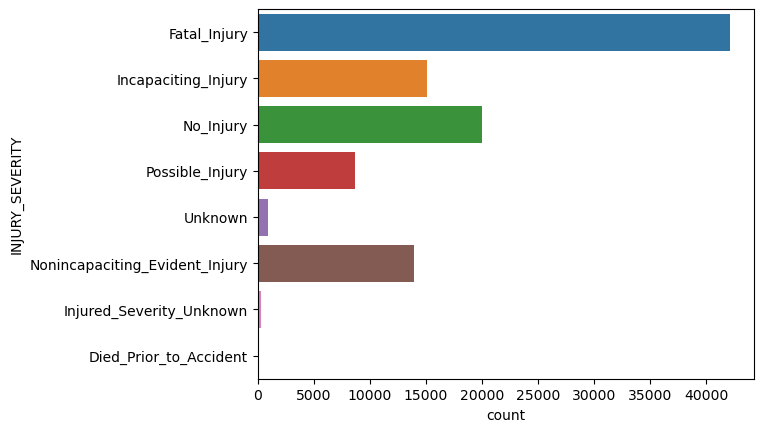

In [5]:
sns.countplot(data = fars_data,y=fars_data['INJURY_SEVERITY'])
plt.show()

- Checking the distribution of the labels in the target variable is important for classification problems since this will affect the training of machine learning models.
- If the majority is more, this will have the model create a bias towards that class and it will miss out on the minority class.

#### 5. Encoding the categorical variables

- In order to encode the categorical variables, we need to understand the type of data before proceeding with type of encoding 
- We will again look at few rows of the data to determine this

In [6]:
fars_data.head(10)

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,Alabama,34,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Available_but_Not_Deployed_for_this_Seat,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
1,Alabama,20,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Deployed_Air_Bag_from_Front,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
2,Alabama,43,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
3,Alabama,38,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
4,Alabama,50,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Deployed_Air_Bag_from_Front,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
5,Alabama,40,Female,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
6,Alabama,50,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),No_Injury
7,Alabama,69,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,None_Used/Not_Applicable,Air_Bag_Not_Available_for_this_Seat,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
8,Alabama,94,Male,Pedestrian,Non-Motorist,None_Used/Not_Applicable,Non-Motorist,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Walking/Riding_with_or_Against_Traffic_Playing...,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
9,Alabama,47,Male,Driver,Front_Seat_-_Left_

- Since the categorical columns are not ordered in nature, we can proceed with One-Hot encoding. 
- Label encoding would be applied if we had any ordered data. In our case, there are no ordered categorical variables.
- For the Target variable, we will directly impute the values so that we can reverse it easily after the model results.

In [7]:
# Imputing Categorical Variables 
categorical_columns = fars_data.select_dtypes(include=['object']).columns # getting all the categorical columns
categorical_columns = [x for x in categorical_columns if x != 'INJURY_SEVERITY'] # exluding target variable

# Applying One-Hot Encoding except for Target Variable
encoded_data = pd.get_dummies(fars_data, columns=categorical_columns, drop_first=True)

# Creating the mapping dictionary for the target variable
encoding_mapping = {
    'Unknown': 0, 
    'Injured_Severity_Unknown': 1, 
    'Died_Prior_to_Accident': 2,
    'No_Injury': 3,
    'Possible_Injury': 4, 
    'Nonincapaciting_Evident_Injury': 5, 
    'Incapaciting_Injury': 6,
    'Fatal_Injury': 7                                            
                    }

# Mapping the numbers to the target variable classes
encoded_data['INJURY_SEVERITY_encoded'] = encoded_data['INJURY_SEVERITY'].map(encoding_mapping)
encoded_data = encoded_data.drop('INJURY_SEVERITY', axis=1) # Dropping original column 'INJURY_SEVERITY' as it has already been encoded


#### 6. Checking Distribution of the Numerical variables

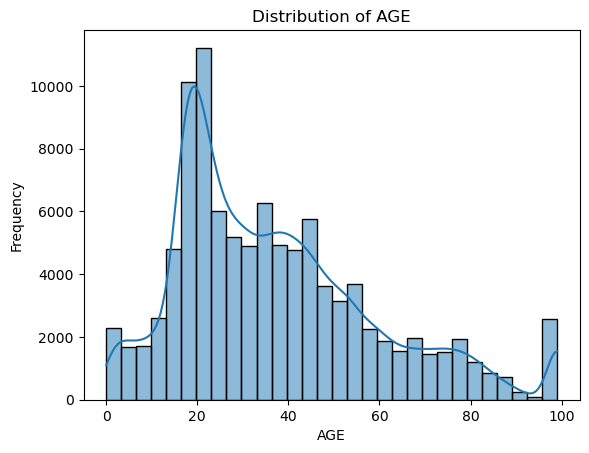

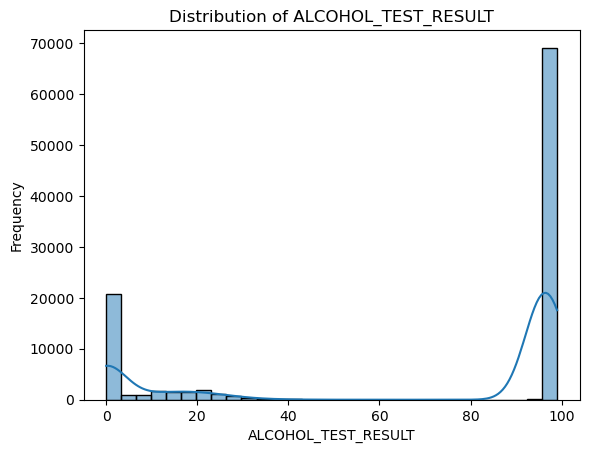

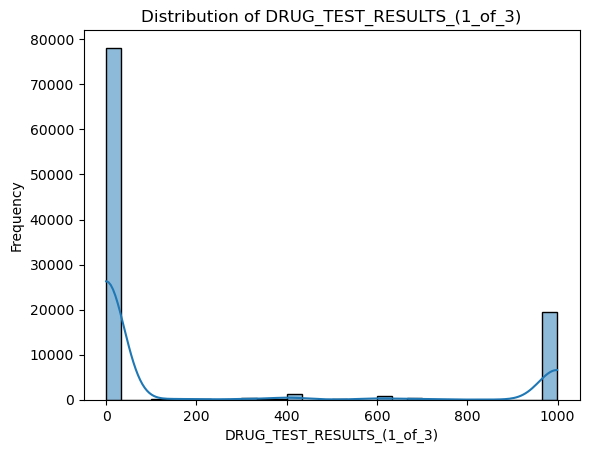

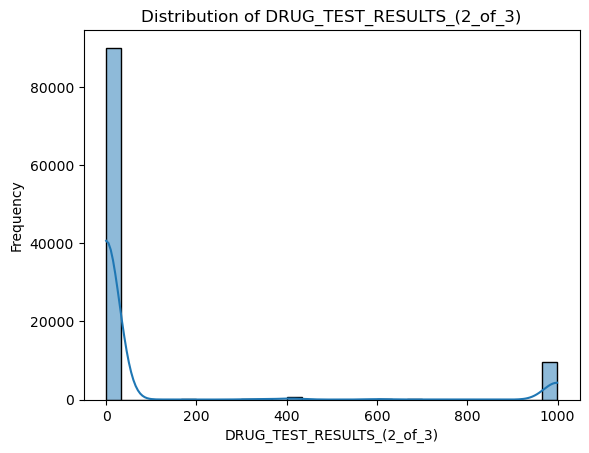

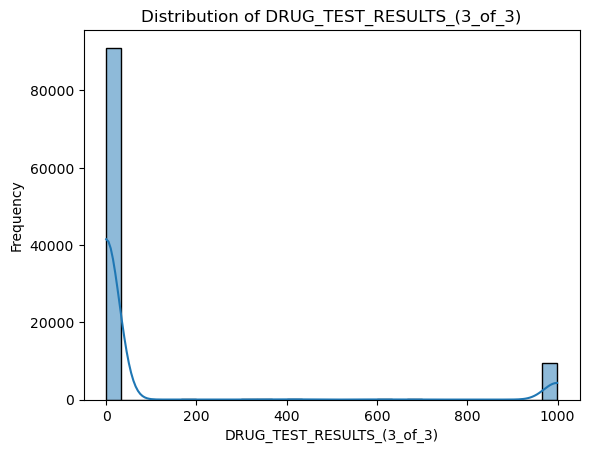

In [8]:
numerical_columns = fars_data.select_dtypes(include=['int']).columns # getting all the numerical columns

for x in numerical_columns:
    sns.histplot(fars_data[x], kde=True, bins=30) # plotting histogram to see distribution
    plt.title(f"Distribution of {x}")
    plt.xlabel(x)
    plt.ylabel("Frequency")
    plt.show()

- From the graphs, we can see the numerical columns are all skewed to certain degrees. 
- Feeding the data as is to the model, will affect the model performance. 
- In order to fix this, we will perform Normalization to reduce skewness.

#### 7. Data Normalization

In [9]:
data_scaled = encoded_data.copy()

# Data Normalization
scaler = StandardScaler()

# Standardize the numerical columns
data_scaled[numerical_columns] = scaler.fit_transform(data_scaled[numerical_columns])

#### 8. Splitting data into X(features) and Y(Target)

In [10]:
# Splitting features and labels
X = data_scaled.iloc[:, :-1]  # Features
y = data_scaled.iloc[:, -1]   # Target Variable 

#### 9. Performance Metrics used for Classification

- The confusion matrix is used to show how the model has classified the classes. 
- The diagonal line is the correct predictions for each label. The other values are misclassified.
- Accuracy is used as it gives us the correct predicted values to the total values predicted and is also a popular metric for classification.
- F1 Score is used, since it is the harmonic mean for precison and recall.

[Back-to-Classification](#CLASSIFICATION) 

### PIPELINE 1

#### DECISION TREE

Fold 1: Test Set Accuracy = 0.758
Fold 1: Test Set F1 Score = 0.758


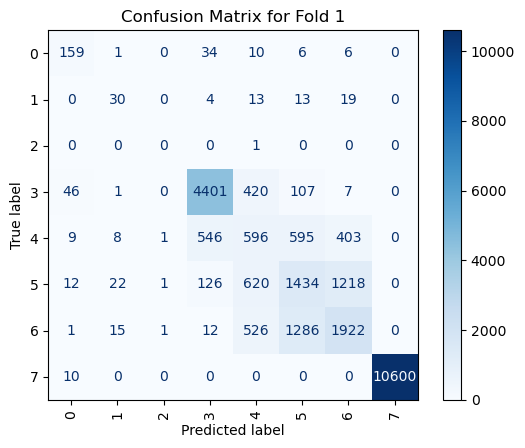

Fold 2: Test Set Accuracy = 0.761
Fold 2: Test Set F1 Score = 0.761


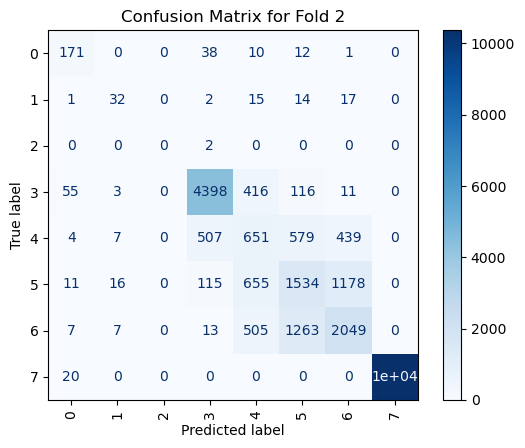

Fold 3: Test Set Accuracy = 0.758
Fold 3: Test Set F1 Score = 0.758


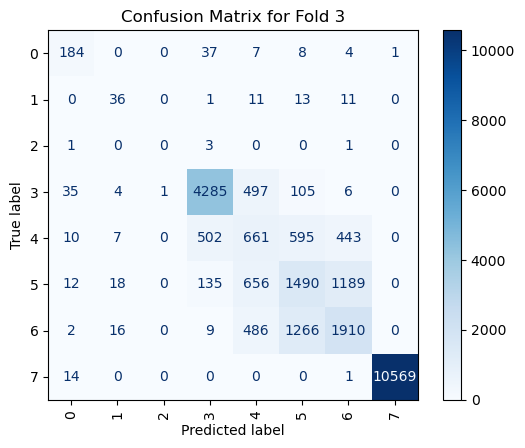

Fold 4: Test Set Accuracy = 0.76
Fold 4: Test Set F1 Score = 0.761


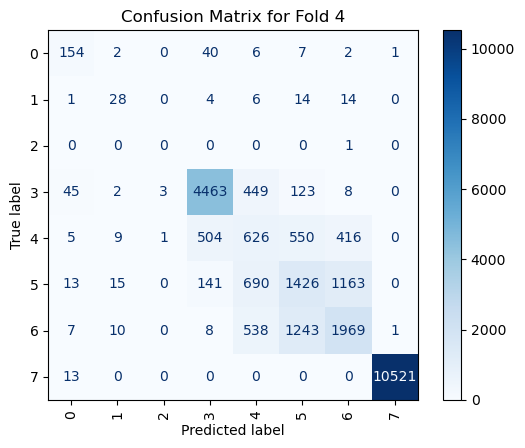


Overall Test Set Performance Metrics:
Mean Accuracy = 0.759
Mean F1 Score = 0.759


In [11]:
# Initialize KFold for train-test split
outer_kfold = KFold(n_splits=4, shuffle=True, random_state=26)

# To store fold-wise test results
test_fold_accuracies = []
test_fold_f1s = []

# KFold for splitting into train and test sets
for fold, (train_idx, test_idx) in enumerate(outer_kfold.split(X)):
    # Splitting into train and test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Initialize Decision Tree Classifier
    dtree = DecisionTreeClassifier(random_state=26)
    
    # Train the model
    dtree.fit(X_train, y_train)
    
    # Predict on the test set
    y_test_pred = dtree.predict(X_test)
    
    # Performance metrics for each test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average="weighted", zero_division=0)
    
    test_fold_accuracies.append(test_accuracy)
    test_fold_f1s.append(test_f1)
    
    print(f"Fold {fold + 1}: Test Set Accuracy = {round(test_accuracy,3)}")
    print(f"Fold {fold + 1}: Test Set F1 Score = {round(test_f1,3)}")
    
    # Generating confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Plotting the confusion matrix for the current fold
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
    disp.plot(cmap='Blues', xticks_rotation='vertical')
    plt.title(f"Confusion Matrix for Fold {fold + 1}")
    plt.show()

# Average test performance across folds
mean_test_accuracy_1 = np.mean(test_fold_accuracies)
mean_test_f1_1 = np.mean(test_fold_f1s)

print("\nOverall Test Set Performance Metrics:")
print(f"Mean Accuracy = {round(mean_test_accuracy_1,3)}")
print(f"Mean F1 Score = {round(mean_test_f1_1,3)}")


##### Observations

- Understanding the confusion matrix:  
    - The diagonal values are the correctly predicted values for each label
    - In Fold 4, we can see that for label 3, while 4463 have been predicted correctly as label 3:
        - 45 have been incorrectly predicted as label 0
        - 2 have been incorrectly predicted as label 1
        - 3 have been incorrectly predicted as label 2
        - 449 have been incorrectly predicted as label 4
        - 123 have been incorrectly predicted as label 5
        - 8 have been incorrectly predicted as label 6
    
    

Using Decision Tree Classifier in the first pipeline, we have obtained the following results:

- The model performance from looking at the confusion matrix and the accuracy and F1 score suggests that it has performed okay. 
- It can be further improved. 
- For the next pipeline, trying a random forest classifier, which takes a collective decision based on multiple decision trees may improve the results of the pipeline.

[Back-to-Classification](#CLASSIFICATION) 

### PIPELINE 2

#### RANDOM FOREST

Fold 1: Test Set Accuracy = 0.776
Fold 1: Test Set F1 Score = 0.77


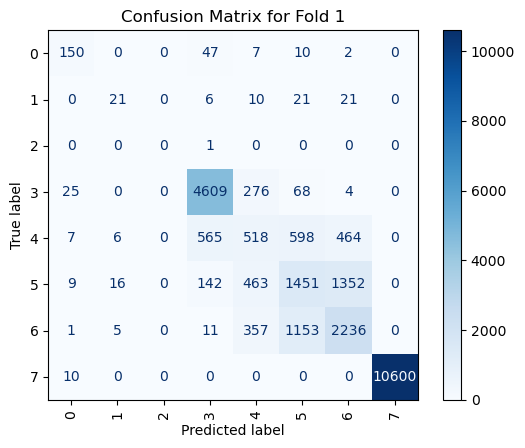

Fold 2: Test Set Accuracy = 0.772
Fold 2: Test Set F1 Score = 0.766


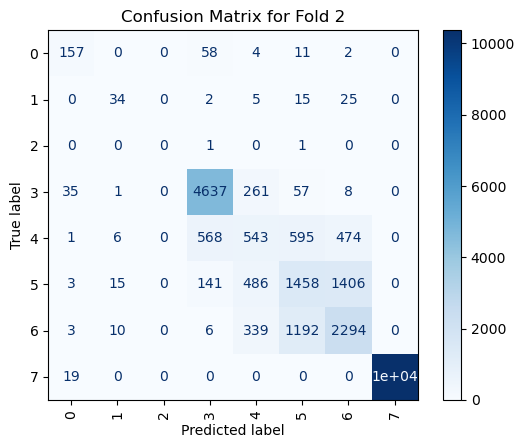

Fold 3: Test Set Accuracy = 0.779
Fold 3: Test Set F1 Score = 0.773


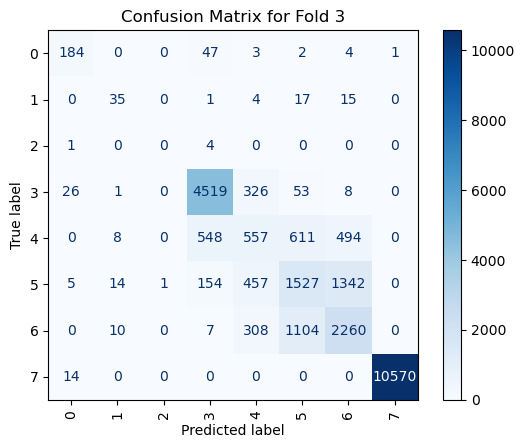

Fold 4: Test Set Accuracy = 0.78
Fold 4: Test Set F1 Score = 0.775


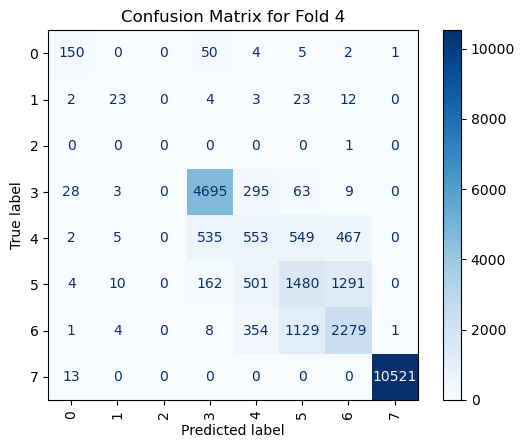


Overall Test Set Performance Metrics:
Mean Accuracy = 0.777
Mean F1 Score = 0.771


In [12]:
# Initializing KFold for train-test split
outer_kfold = KFold(n_splits=4, shuffle=True, random_state=26)

# To store fold-wise test results
test_fold_accuracies = []
test_fold_f1s = []

# KFold for splitting into train and test sets
for fold, (train_idx, test_idx) in enumerate(outer_kfold.split(X)):
    # Splitting into train and test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Initializing Random Forest Classifier
    rf = RandomForestClassifier(random_state=26)
    
    # Training the model
    rf.fit(X_train, y_train)
    
    # Predicting on the test set
    y_test_pred = rf.predict(X_test)
    
    # Performance metrics for each test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average="weighted", zero_division=0)
    
    test_fold_accuracies.append(test_accuracy)
    test_fold_f1s.append(test_f1)
    
    print(f"Fold {fold + 1}: Test Set Accuracy = {round(test_accuracy,3)}")
    print(f"Fold {fold + 1}: Test Set F1 Score = {round(test_f1,3)}")
    
    # Generating confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Plotting the confusion matrix for the current fold
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
    disp.plot(cmap='Blues', xticks_rotation='vertical')
    plt.title(f"Confusion Matrix for Fold {fold + 1}")
    plt.show()

# Average test performance across folds
mean_test_accuracy_2 = np.mean(test_fold_accuracies)
mean_test_f1_2 = np.mean(test_fold_f1s)

print("\nOverall Test Set Performance Metrics:")
print(f"Mean Accuracy = {round(mean_test_accuracy_2,3)}")
print(f"Mean F1 Score = {round(mean_test_f1_2,3)}")


##### Observations

- Compared to Pipeline 1, we have obtained better results as expected.
- Accuracy has increased to **78%** and F1 score has increased to **77%**


[Back-to-Classification](#CLASSIFICATION) 

### PIPELINE 3

#### KNN (K Nearest Neighbours)

Fold 1: Test Set Accuracy = 0.758
Fold 1: Test Set F1 Score = 0.75


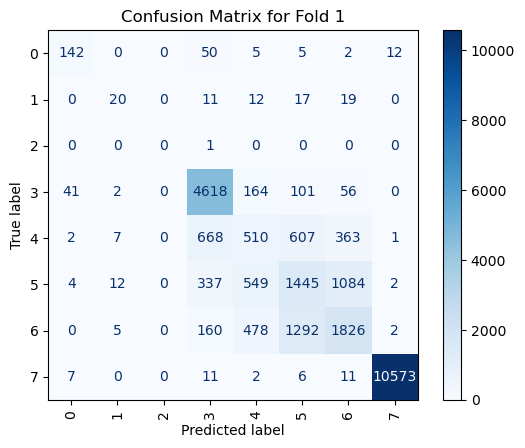

Fold 2: Test Set Accuracy = 0.756
Fold 2: Test Set F1 Score = 0.749


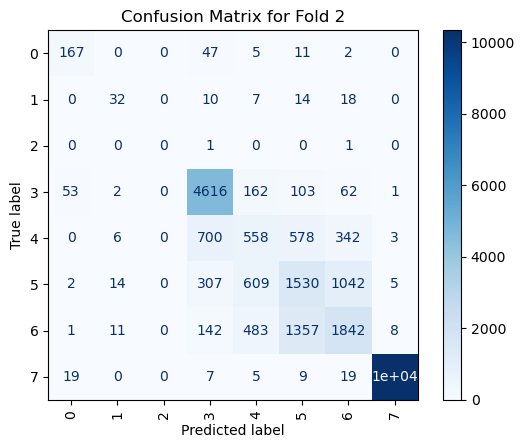

Fold 3: Test Set Accuracy = 0.76
Fold 3: Test Set F1 Score = 0.752


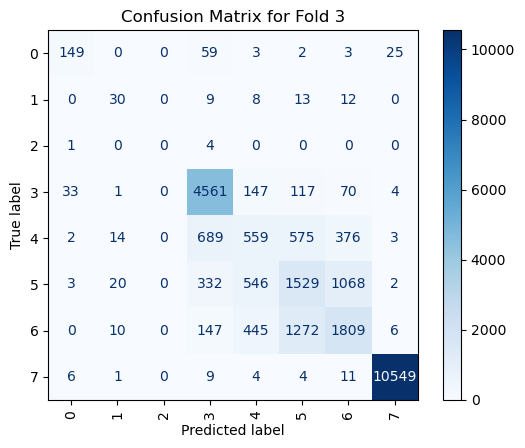

Fold 4: Test Set Accuracy = 0.76
Fold 4: Test Set F1 Score = 0.753


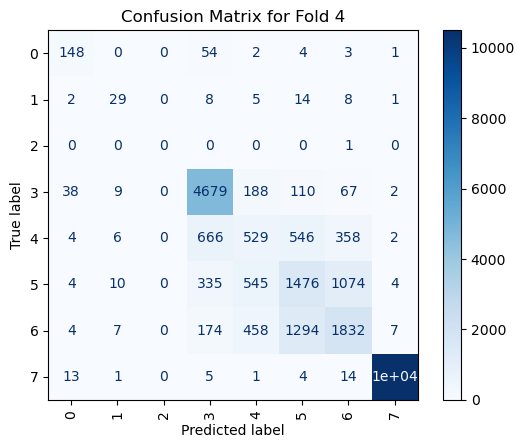


Overall Test Set Performance Metrics:
Mean Accuracy = 0.758
Mean F1 Score = 0.751


In [13]:
# Initializing KFold for train-test split
outer_kfold = KFold(n_splits=4, shuffle=True, random_state=26)

# To store fold-wise test results
test_fold_accuracies = []
test_fold_f1s = []

# KFold for splitting into train and test sets
for fold, (train_idx, test_idx) in enumerate(outer_kfold.split(X)):
    # Splitting into train and test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Initializing KNeighborsClassifier
    knn = KNeighborsClassifier()
    
    # Training the model
    knn.fit(X_train, y_train)
    
    # Predicting on the test set
    y_test_pred = knn.predict(X_test)
    
    # # Performance metrics for each test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average="weighted", zero_division=0)
    
    test_fold_accuracies.append(test_accuracy)
    test_fold_f1s.append(test_f1)
  
    print(f"Fold {fold + 1}: Test Set Accuracy = {round(test_accuracy,3)}")
    print(f"Fold {fold + 1}: Test Set F1 Score = {round(test_f1,3)}")
    
    # Generating confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Plotting the confusion matrix for the current fold
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
    disp.plot(cmap='Blues', xticks_rotation='vertical')
    plt.title(f"Confusion Matrix for Fold {fold + 1}")
    plt.show()

# Average test performance across folds
mean_test_accuracy_3 = np.mean(test_fold_accuracies)
mean_test_f1_3 = np.mean(test_fold_f1s)


print("\nOverall Test Set Performance Metrics:")
print(f"Mean Accuracy = {round(mean_test_accuracy_3,3)}")
print(f"Mean F1 Score = {round(mean_test_f1_3,3)}")


##### Observations

- KNN has performed okay but compared to Random Forest Classifier, it has underperformed.
- It can also be observed for pipelines 1,2 and 3, because of class imbalance, class '7' which has the highest number of values is predicted the best compared to the other classes. This indicates a bias in the training of the model.
- Model results can improve with hyperparameter tuning or with model stacking, like including a booster model on top of the base model like Gradient Boosting.

[Back-to-Classification](#CLASSIFICATION) 

### PIPELINE 4

#### Best Algorithm with Hyperparameter tuning and RFE (Recursive Feature Elimination)

- From the previous three pipelines, we can see that **Random Forest Classifier** has given the best result.

- In Pipeline 4, we will be using Random Forest with these additional tweaks:  


     **1. Hyperparameter tuning** - To find the best values for the parameters of Random Forest Classifier. Randomized search CV is used instead of Grid Search CV to reduce computation cost as grid search is an exhaustive search.   
     **2. Recursive Feature Elimination** - To identify the top 3 features useful for classifying   
     **3. Class Imbalance** has been treated using the parameter class_weight='balanced' in the Random Forest Classifier model   
     **4. Subsampling** 10% of the data to perform hyperparameter tuning( to reduce computational cost)

        

Fold 1: Test Set Accuracy = 0.775
Fold 1: Test Set F1 Score = 0.7
Best Params for Fold 1: {'rf__n_jobs': -1, 'rf__n_estimators': 75, 'rf__min_samples_split': 5, 'rf__max_depth': 3}


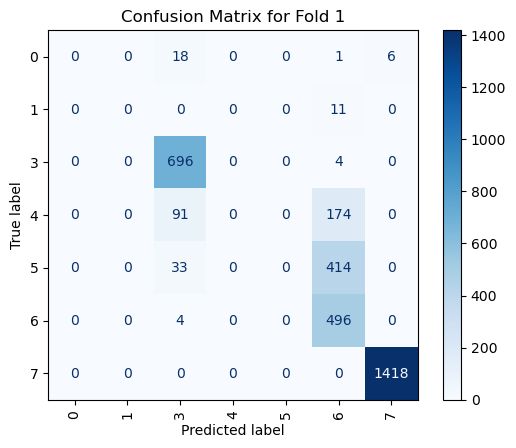

Fold 2: Test Set Accuracy = 0.627
Fold 2: Test Set F1 Score = 0.602
Best Params for Fold 2: {'rf__n_jobs': -1, 'rf__n_estimators': 75, 'rf__min_samples_split': 5, 'rf__max_depth': 3}


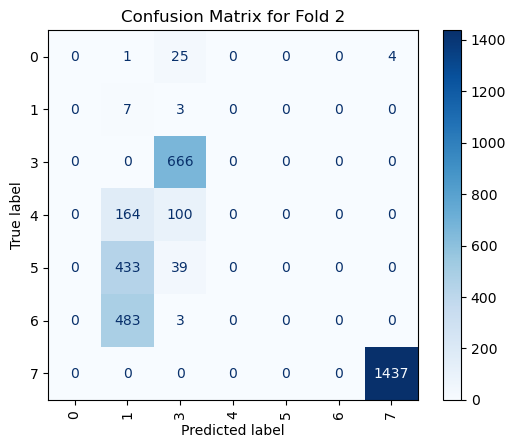

Fold 3: Test Set Accuracy = 0.766
Fold 3: Test Set F1 Score = 0.69
Best Params for Fold 3: {'rf__n_jobs': -1, 'rf__n_estimators': 75, 'rf__min_samples_split': 5, 'rf__max_depth': 3}


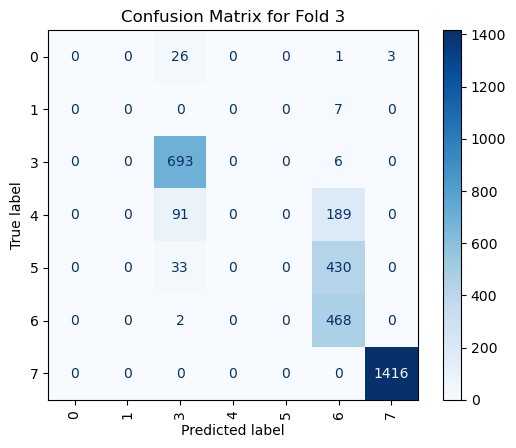


Overall Test Set Performance Metrics:
Mean Accuracy = 0.723
Mean F1 Score = 0.664


In [14]:
# Subsampling 10% of the data - setting test_size to 0.9 
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.9, random_state=26)

# Initializing KFold for cross-validation
kfold = KFold(n_splits=3, shuffle=True, random_state=26)

# Hyperparameter grid for RandomForestClassifier
param_grid = {
    "rf__n_estimators": [50, 75],  # Smaller range of estimators
    "rf__max_depth": [3, 5],      # Limited depth
    "rf__min_samples_split": [2, 5],  # Simplified grid
    "rf__n_jobs": [-1]
}

# To store test set results across all folds
test_fold_accuracies = []
test_fold_f1s = []

# KFold cross-validation loop
for fold, (train_idx, test_idx) in enumerate(kfold.split(X_sample)):
    # Splitting into train and test sets
    X_train, X_test = X_sample.iloc[train_idx], X_sample.iloc[test_idx]
    y_train, y_test = y_sample.iloc[train_idx], y_sample.iloc[test_idx]
    
    # Defining the pipeline with RFE and RandomForestClassifier
    pipeline = Pipeline([
        ('feature_selection', RFE(estimator=RandomForestClassifier(random_state=26), n_features_to_select=3)), 
        ('rf', RandomForestClassifier(random_state=26, class_weight='balanced', n_jobs=-1))
    ])
    
    # Hyperparameter tuning using RandomizedSearchCV with the pipeline
    randomized_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grid,
        n_iter=3,  # Reduced iterations
        cv=2,      # Internal cross-validation folds
        scoring="accuracy",
        random_state=26,
        n_jobs=-1
    )
    
    # Fit the randomized search to the training data
    randomized_search.fit(X_train, y_train)
    
    # Getting the best estimator
    best_rf = randomized_search.best_estimator_
    
    # Predicting on the test set
    y_test_pred = best_rf.predict(X_test)
    
    # Calculating performance metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average="weighted", zero_division=0)
    
    test_fold_accuracies.append(test_accuracy)
    test_fold_f1s.append(test_f1)
    
    print(f"Fold {fold + 1}: Test Set Accuracy = {round(test_accuracy,3)}")
    print(f"Fold {fold + 1}: Test Set F1 Score = {round(test_f1,3)}")
    print(f"Best Params for Fold {fold + 1}: {randomized_search.best_params_}")
    
    # Generating confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Plotting the confusion matrix for the current fold
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues', xticks_rotation='vertical')
    plt.title(f"Confusion Matrix for Fold {fold + 1}")
    plt.show()

# Average performance metrics across folds
mean_test_accuracy_4 = np.mean(test_fold_accuracies)
mean_test_f1_4 = np.mean(test_fold_f1s)

print("\nOverall Test Set Performance Metrics:")
print(f"Mean Accuracy = {round(mean_test_accuracy_4,3)}")
print(f"Mean F1 Score = {round(mean_test_f1_4,3)}")


##### Observations

- **The underperformance of this model could be due to the following reasons:**  
    1. Less choices for hyperparameters  
    2. 10% sub-sampling which drastically reduced the training dataset 
    
- **With more computational power, the following can be tried which can yield better model results:**   
    1. providing the entire dataset instead of subsampling  
    2. Using more hyperparameters for model tuning  
    3. Trying boosting methods on top of the base model, i.e model stacking  
    4. Trying GridSearch insted of RandomizedSearch  
    5. Increasing the number of folds in KFold  
    6. Increasing the number of features to select in recursive feature elimination

### RESULTS - Classification

In [15]:
pipeline_1_results = [round(mean_test_accuracy_1,3),  round(mean_test_f1_1,3)]
pipeline_2_results = [round(mean_test_accuracy_2,3),  round(mean_test_f1_2,3)]
pipeline_3_results = [round(mean_test_accuracy_3,3),  round(mean_test_f1_3,3)]
pipeline_4_results = [round(mean_test_accuracy_4,3),  round(mean_test_f1_4,3)]

In [16]:
results_pipeline = pd.DataFrame({'Pipeline 1: Decision Tree':pipeline_1_results,
                               'Pipeline 2: Random Forest': pipeline_2_results,
                               'Pipeline 3: KNN': pipeline_3_results,
                               'Pipeline 4: Random Forest with Tuning' : pipeline_4_results})
results_pipeline.index = ['Accuracy', 'F1 Score']
results_pipeline

,Pipeline 1: Decision Tree,Pipeline 2: Random Forest,Pipeline 3: KNN,Pipeline 4: Random Forest with Tuning
Accuracy,0.759,0.777,0.758,0.723
F1 Score,0.759,0.771,0.751,0.664


Considering the results of the four pipelines, **Pipeline 2**, which employed a Random Forest Classifier provided the best results.